In [3]:
import sys
import os
print(os.getcwd())
# sys.path.append("..")

/home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests


In [ ]:
from build_model import BuildModel
from build_model import buildModel

# Build the model
input_stats_path = "Four_Well_beta3_gamma4_traj_data.stats.pt"
output_model_pth_file = "test_model.pth"

n_features = 2
num_states = 10  

properties = {
    'model_type': 'SPIB',
    'n_cvs': 1,
    'encoder_layers': [n_features, 16],
    'decoder_layers': [16, num_states],
    'options': {
        'encoder': {'activation': 'relu', "last_layer_activation": True},
        'decoder': {'activation': 'relu', "last_layer_activation": False},
        'optimizer': {'lr': 0.001},
        'UpdateLabel': True,
        'patience': 2,
        'refinements': 4,
        'threshold': 1e-2,
        'k': num_states,
        'loss_function': {
            'loss_type': 'InformationBottleneckLoss',
            'beta': 0.01,  
        }
    }
}

buildModel(input_stats_pt_path=input_stats_path,
           output_model_pth_path=output_model_pth_file,
           properties=properties)


ModuleNotFoundError: No module named 'mdae'

In [4]:
from train_model import TrainModel
from train_model import trainModel

properties = {
    'Dataset': {
        'batch_size': 512,
        'split': {'random_split': False,
                  'train_prop': 1.0,
                  'val_prop': 0.0,
        }
    },
    'Trainer': {
        'max_epochs': 32,
        'enable_checkpointing': False,
        'callbacks': {},
        
    },
    'disable_sandbox': True
}

# load the model
input_model_pth_file = "test_model.pth"
input_dataset_pt_path =  "1NE4_6NO7_b.dcd.pt"
input_dataset_pt_path = "Four_Well_beta3_gamma4_traj_data.pt"

output_model_pth_file = "test_model.pth"
output_model_metrics_file = "test_model_metrics.npz"

trainModel(
    input_model_pth_path=input_model_pth_file,
    input_dataset_pt_path=input_dataset_pt_path,
    output_model_pth_path=output_model_pth_file,
    output_metrics_npz_path=output_model_metrics_file,
    properties=properties
)


2025-07-28 15:27:49,469 [MainThread  ] [INFO ]  ## BioBB Model Trainer ##
2025-07-28 15:27:49,469 [MainThread  ] [INFO ]  Load model from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests/test_model.pth
2025-07-28 15:27:49,471 [MainThread  ] [INFO ]  Load dataset from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests/Four_Well_beta3_gamma4_traj_data.pt
2025-07-28 15:27:49,478 [MainThread  ] [INFO ]  Start training...


/home/pzanders/miniconda3/envs/mdaenv/lib/python3.12/site-packages/mlcolvar/data/datamodule.py:133: UserWarning: A torch.generator was provided but it is not used with random_split=False
  warnings.warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/pzanders/miniconda3/envs/mdaenv/lib/python3.12/site-packages/mlcolvar/data/datamodule.py:280: UserWarning: Length of split at index 1 is 0. This might result in an empty dataset.
  warnings.warn(

  | Name                   | Type                      | Params | Mode  | In sizes | Out sizes
----------------------------------------------------------------------------------------------------
0 | representative_weights | Sequential                | 10     | train | ?        | ?        
1 | encoder                | FeedForward               | 48     | train | [1, 2]   | [1, 16]  
2 | encoder_mean           | Linear                    | 17     | train | [1, 16]  | [1, 1]   
3

/home/pzanders/miniconda3/envs/mdaenv/lib/python3.12/site-packages/lightning/pytorch/utilities/data.py:105: Total length of `DictLoader` across ranks is zero. Please make sure this was your intention.


Epoch 31: 100%|██████████| 528/528 [00:03<00:00, 159.01it/s, v_num=109, train_loss_step=1.040, train_recon_step=0.817, train_kl_step=22.20, train_loss_epoch=1.160, train_recon_epoch=0.936, train_kl_epoch=22.40]

`Trainer.fit` stopped: `max_epochs=32` reached.


Epoch 31: 100%|██████████| 528/528 [00:03<00:00, 158.81it/s, v_num=109, train_loss_step=1.040, train_recon_step=0.817, train_kl_step=22.20, train_loss_epoch=1.160, train_recon_epoch=0.936, train_kl_epoch=22.40]
2025-07-28 15:29:41,042 [MainThread  ] [INFO ]  Training Metrics saved to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests/test_model_metrics.npz
2025-07-28 15:29:41,043 [MainThread  ] [INFO ]  File size: 3.3 KB
2025-07-28 15:29:41,046 [MainThread  ] [INFO ]  Trained Model saved to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests/test_model.pth
2025-07-28 15:29:41,046 [MainThread  ] [INFO ]  File size: 11.91 KB
2025-07-28 15:29:41,047 [MainThread  ] [INFO ]  Removed: []


0

In [8]:
from evaluate_model import evaluateModel
from evaluate_model import EvaluateModel

# Evaluate the model
input_model_pth_path = "test_model.pth"
input_dataset_pt_path =  "1NE4_6NO7_b.dcd.pt"
input_dataset_pt_path = "Four_Well_beta3_gamma4_traj_data.pt"
output_model_results_file = "test_model_results.npz"

properties = {
    'Dataset': {
        'batch_size': 512,
        
        }
    }

evaluateModel(
    input_model_pth_path=input_model_pth_path,
    input_dataset_pt_path=input_dataset_pt_path,
    output_results_npz_path=output_model_results_file,
    properties=properties
)


2025-07-28 15:30:33,646 [MainThread  ] [INFO ]  ## BioBB Model Evaluator ##
2025-07-28 15:30:33,667 [MainThread  ] [INFO ]  Copy: test_model.pth to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests/eda11d4f-0836-4b1f-8608-5f59a0ce5afa
2025-07-28 15:30:33,676 [MainThread  ] [INFO ]  Copy: Four_Well_beta3_gamma4_traj_data.pt to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests/eda11d4f-0836-4b1f-8608-5f59a0ce5afa
2025-07-28 15:30:33,676 [MainThread  ] [INFO ]  Load model from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests/test_model.pth
2025-07-28 15:30:33,678 [MainThread  ] [INFO ]  Load dataset from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests/Four_Well_beta3_gamma4_traj_data.pt
2025-07-28 15:30:33,681 [MainThread  ] [INFO ]  Start evaluating...
2025-07-28 15:30:37,194 [MainThread  ] [INFO ]  Evaluation Results saved to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests/test_model_resu

0

/tmp/ipykernel_141302/1652743311.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = c.get_cmap('viridis', 10)  # 10 discrete


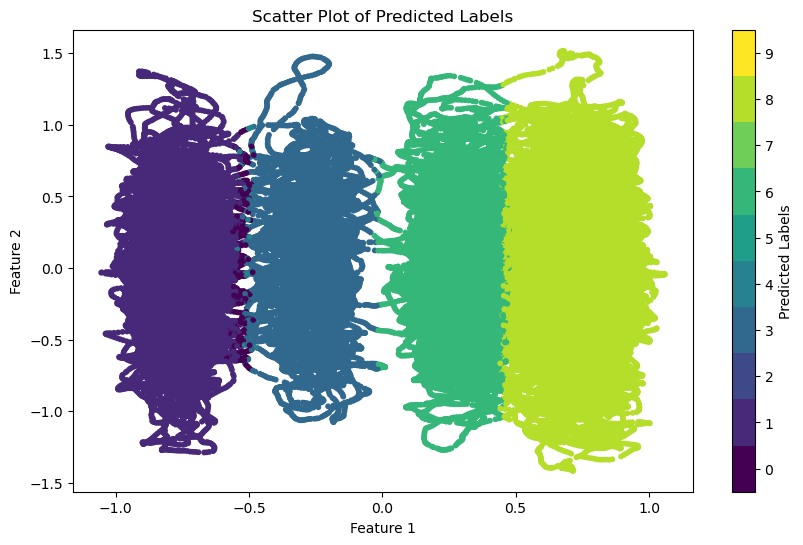

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import matplotlib.cm as c

x = np.load("test_model_results.npz", allow_pickle=True)
labels = torch.tensor(x['labels'])

data = torch.load("Four_Well_beta3_gamma4_traj_data.pt")
data = data['data']

plt.figure(figsize=(10, 6))
cmap = c.get_cmap('viridis', num_states)  
plt.scatter(data[:, 0], data[:, 1], c=labels.numpy(), cmap=cmap, s=10, alpha=1.0)
plt.colorbar(ticks=range(num_states), label='Predicted Labels')
plt.clim(-0.5, num_states-0.5)  # Set color limits for discrete colors 
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Predicted Labels')
plt.show()